<a href="https://colab.research.google.com/github/ai-coodinator/yolact_edge/blob/main/yolact_edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ai-coodinator/blob/https://github.com/ai-coodinator/yolact_edge/yolact_edge.ipynb)

# YolactEdge Google Colab Notebook
Inference on images with [YolactEdge](https://github.com/haotian-liu/yolact_edge). We will continue to update this Colab Notebook for more results and features, stay tuned!

### Runtime Setup
- Go to Runtime > Change Runtime Type
- Choose GPU (TPU won't work)

## YolactEdge
YolactEdge is the first competitive instance segmentation approach that runs on small edge devices at real-time speeds. For details of YolactEdge, please refer to our paper:
- [YolactEdge: Real-time Instance Segmentation on the Edge (Jetson AGX Xavier: 30 FPS, RTX 2080 Ti: 170 FPS)](https://arxiv.org/abs/2012.12259)

# Install

In [1]:
# GPU
!nvidia-smi -L

# Github
!git clone https://github.com/ai-coodinator/yolact_edge.git
!git clone https://github.com/chentinghao/download_google_drive.git
%cd yolact_edge
!mkdir -p weights

!python ../download_google_drive/download_gdrive.py 1EAzO-vRDZ2hupUJ4JFSUi40lAZ5Jo-Bp ./weights/yolact_edge_54_800000.pth
!python ../download_google_drive/download_gdrive.py 15jyd5CRJxNiA41UMjGbaSnmaytfeILfI ./calib_images_coco.zip
!unzip -q calib_images_coco.zip

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import HTML
from base64 import b64encode

GPU 0: Tesla T4 (UUID: GPU-056f6230-4ff4-0e55-cb53-43417ac17059)
Cloning into 'yolact_edge'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 73 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
/content/yolact_edge
194MB [00:01, 185MB/s]
15.8MB [00:00, 181MB/s]


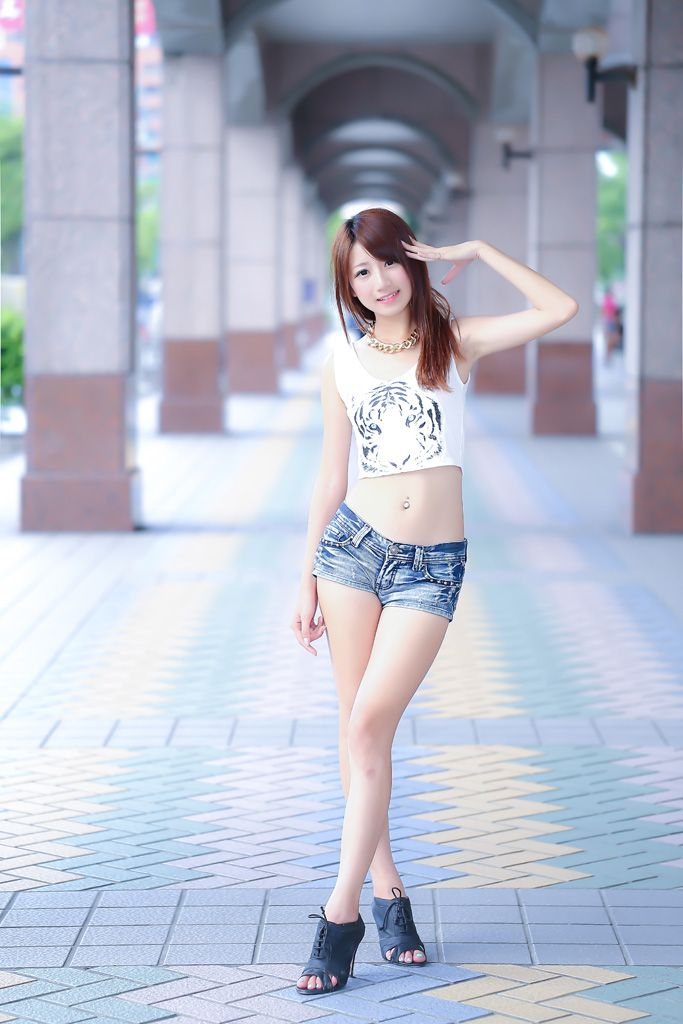

In [2]:
im = cv2.imread("./pic/sample.jpg")
cv2_imshow(im)

In [3]:
!python eval.py --trained_model=weights/yolact_edge_54_800000.pth\
                --score_threshold=0.15 --top_k=100\
                --image=pic/sample.jpg:output_img.jpg\
                --disable_tensorrt

/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/yolact_edge/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
In file included from /usr/local/lib/python3.7/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1822:0,
                 from /usr/local/lib/python3.7/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.7/dist-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /root/.pyxbld/temp.linux-x86_64-3.7/pyrex/utils/cython_nms.c:610:
/usr/local/lib/python3.7/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it with " \
  ^~~~~~~
Config not specifie

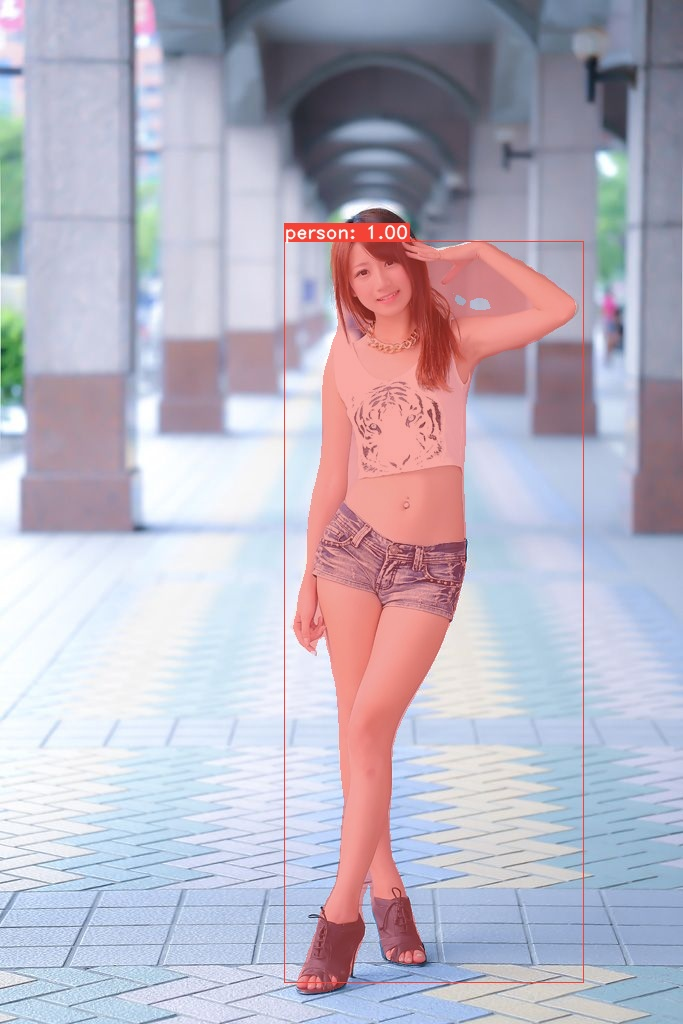

In [4]:
im = cv2.imread("./output_img.jpg")
cv2_imshow(im)

In [5]:
!python eval.py --trained_model=weights/yolact_edge_54_800000.pth\
                --score_threshold=0.15 --top_k=100\
                --video=video/sample.mp4:output_video.mp4\
                --disable_tensorrt

Config not specified. Parsed yolact_edge_config from the file name.

[03/26 01:13:39 yolact.eval]: Loading model...
[03/26 01:13:42 yolact.eval]: Model loaded.
Processing Frames  ██████████████████████████████    451 /    451 (100.00%)    11.54 fps        
